In [1]:
# basics perceptron model with simple formula 

#  y = (x1w1 + b) + (x2w2 + b)





#          * w1+b
#    x1 ___________
#                  \          y 
#                   >  f(x) -------> output        
#   x2 ____________/
#          * W2+b


# z = X*W + b




In [2]:
# common activation function

"""

1. sigmoid activation function  :

        - f(z) = 1 / 1 + e(-z)
        
        -  eg : binary classification --> 0 or 1


2. Hyperbolic Tangent :
        
        -  tanh(z) 
        -  eg : output -1 and 1 instead of 0 to 1


3. Rectified Linear Unit (ReLU) :

        - max(x,0)
        
        - found to be very good performance especially dealing with  issue of vanishing gradient.


"""

'\n\n1. sigmoid activation function  :\n\n        - f(z) = 1 / 1 + e(-z)\n        \n        -  eg : binary classification --> 0 or 1\n\n\n2. Hyperbolic Tangent :\n        \n        -  tanh(z) \n        -  eg : output -1 and 1 instead of 0 to 1\n\n\n3. Rectified Linear Unit (ReLU) :\n\n        - max(x,0)\n        \n        - found to be very good performance especially dealing with  issue of vanishing gradient.\n\n\n'

In [3]:
# basic model

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.datasets import boston_housing

In [6]:
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()

In [7]:
# getting the data size

In [8]:
X_train.shape, y_test.shape

((404, 13), (102,))

In [9]:
# normalisaton of the data

In [10]:
# minmax scaler



In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train.max(), X_train_scaled.max(), X_test_scaled.min()

(711.0, 1.0000000000000002, -0.0019120458891013214)

In [15]:
# create a neural network




In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential([
    Dense(550,"relu"),
    Dense(350,"relu"),
    Dense(1)
])

In [18]:
model.compile(
    optimizer = "adam",
    loss = "mse",
    
)

In [19]:
model.fit(X_train_scaled, y_train, epochs = 30 )

Epoch 1/30
13/13 [==============================] - 0s 3ms/step - loss: 497.9744
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 228.3683
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 125.0397
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 80.4377
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 59.8565
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 50.7010
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 45.3944
Epoch 8/30
13/13 [==============================] - 0s 3ms/step - loss: 41.4350
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 36.8103
Epoch 10/30
13/13 [==============================] - 0s 4ms/step - loss: 33.4560
Epoch 11/30
13/13 [==============================] - 0s 3ms/step - loss: 31.2210
Epoch 12/30
13/13 [==============================] - 0s 3ms/step - loss: 27.3962
Epoch 13/30
13/13 [===============

In [20]:
loss_df = pd.DataFrame(data = model.history.history)

<AxesSubplot:>

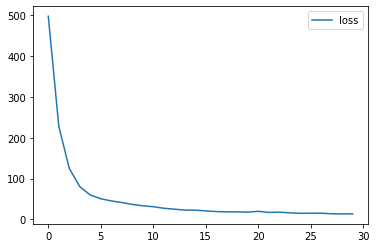

In [21]:
loss_df.plot()

In [22]:
model.evaluate(X_test_scaled, y_test, verbose = 0)

23.687681198120117

In [23]:
test_pred = model.predict(X_test_scaled)

In [24]:
test_series = pd.Series(test_pred.reshape(102,))

In [25]:
pred_data = pd.DataFrame(data = y_test,columns=["original"])

In [26]:
pred_data = pd.concat([pred_data, test_series], axis= 1 )

In [27]:
pred_data.columns = ["original", "prediction"]

In [28]:
pred_data

,original,prediction
0,7.2,9.790006
1,18.8,17.077143
2,19.0,20.117990
3,27.0,33.017353
4,22.2,22.786642
...,...,...
97,21.9,48.204399
98,24.1,24.540525
99,50.0,46.669014
100,26.7,32.155693


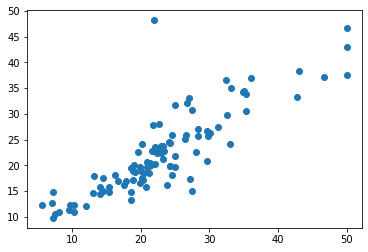

In [29]:
plt.scatter(x = pred_data["original"], y = pred_data["prediction"] )

In [30]:
# using mean absolute error, mean squared error

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(y_test, test_pred)

3.283345534754735

In [33]:
mean_squared_error(y_test, test_pred)

23.687680779648712

In [34]:
# pratices

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

<AxesSubplot:>

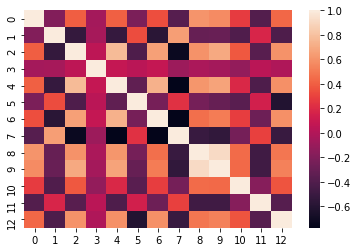

In [37]:
sns.heatmap(pd.DataFrame(X_train).corr())

In [38]:
# scaling the values

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
X_train_scaled.min()

0.0

In [43]:
X_test_scaled = scaler.transform(X_test)

In [44]:
X_test_scaled.max()

1.1478180091225068

In [45]:
# create a model

In [46]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [47]:
model = Sequential([
    Dense(500,"relu"),
    Dense(250,"relu"),
    Dense(1)
])

In [48]:
model.compile(
    optimizer="adam",
    loss = "mse"
)

In [49]:
model.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
13/13 [==============================] - 0s 3ms/step - loss: 484.8480
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 232.2267
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 123.7763
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 84.7229
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 63.7695
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 54.2672
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 48.7772
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 44.3476
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 40.4130
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 37.2635
Epoch 11/50
13/13 [==============================] - 0s 4ms/step - loss: 32.7576
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 30.3942
Epoch 13/50
13/13 [===============

In [50]:
loss = model.history.history

<AxesSubplot:>

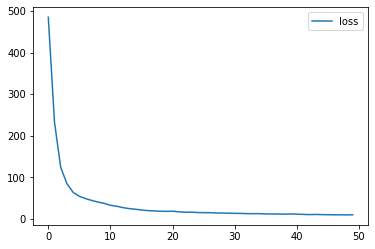

In [51]:
pd.DataFrame(data = loss).plot()

In [52]:
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 25.2873


25.287336349487305

In [55]:
test_pred = pd.Series(model.predict(X_test_scaled).reshape(102,))

In [56]:
test_pred

0       9.748657
1      17.434732
2      21.245710
3      33.139435
4      23.269434
         ...    
97     53.382854
98     25.874777
99     48.905815
100    30.635363
101    19.494753
Length: 102, dtype: float32

In [61]:
test_df = pd.DataFrame(data=y_test)

In [63]:
test_df = pd.concat([test_pred, test_df], axis= 1)

In [67]:
test_df.columns = ["prediciton","original"]

<AxesSubplot:>

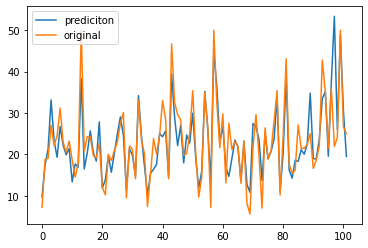

In [69]:
test_df.plot()

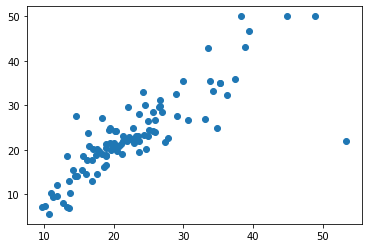

In [76]:
plt.scatter(x = test_df["prediciton"], y= test_df["original"] )

In [74]:
test_df

,prediciton,original
0,9.748657,7.2
1,17.434732,18.8
2,21.245710,19.0
3,33.139435,27.0
4,23.269434,22.2
...,...,...
97,53.382854,21.9
98,25.874777,24.1
99,48.905815,50.0
100,30.635363,26.7


In [89]:
model.predict(scaler.transform([X_train[0]])), y_train[0]

(array([[17.437794]], dtype=float32), 15.2)

In [88]:
# saving the model

In [90]:
from tensorflow.keras.models import load_model

In [91]:
model.save("first_model.h5")

In [94]:
# loading the model

In [92]:
prev_model = load_model("first_model.h5")

In [93]:
prev_model.predict(scaler.transform([X_train[0]])), y_train[0]

(array([[17.437794]], dtype=float32), 15.2)